# Catch Them All

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format

The following dataset was taken from https://www.kaggle.com/alopez247/pokemon

In [2]:
df = pd.read_csv('C:\\Users\\cocob\\Downloads\\pokemon_alopez247.csv')

In [3]:
df.columns.values

array(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation',
       'isLegendary', 'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1',
       'Egg_Group_2', 'hasMegaEvolution', 'Height_m', 'Weight_kg',
       'Catch_Rate', 'Body_Style'], dtype=object)

## Data Manipulation

In [4]:
df2 = df.dropna()

In [5]:
#df2['MegaEvolution'] = df2['hasMegaEvolution'] = 'True', 1, 0
df2['MegaEvolution'] = np.where((df2['hasMegaEvolution'].isin([True])), 1, 0)
df2['Catchrate2'] = np.where(df2['Catch_Rate'] >= 100, 1, 0)

c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\cocob\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df2.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate,MegaEvolution,Catchrate2
count,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,361.333,422.039,70.059,76.431,75.431,69.284,70.304,60.529,3.353,0.586,1.135,53.834,94.529,0.098,0.314
std,203.661,93.099,20.885,27.982,24.521,24.211,21.502,24.781,1.645,0.178,0.772,65.490,66.041,0.299,0.466
min,1.000,210.000,30.000,20.000,30.000,20.000,25.000,10.000,1.000,0.000,0.200,0.500,25.000,0.000,0.000
25%,190.250,340.000,55.000,55.000,55.500,54.250,55.000,42.500,2.000,0.500,0.610,9.750,45.000,0.000,0.000
50%,360.000,430.500,70.000,75.000,76.500,65.000,70.000,59.000,3.000,0.500,0.990,29.000,67.500,0.000,0.000
75%,546.750,493.000,84.750,92.000,90.000,85.000,85.000,80.000,5.000,0.500,1.400,78.225,120.000,0.000,1.000
max,709.000,600.000,130.000,140.000,133.000,125.000,123.000,116.000,6.000,1.000,6.500,310.000,255.000,1.000,1.000


In [7]:
df2.head(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,MegaEvolution,Catchrate2
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,0.875,Monster,Grass,False,0.710,6.900,45,quadruped,0,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,0.875,Monster,Grass,False,0.990,13.000,45,quadruped,0,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,0.875,Monster,Grass,True,2.010,100.000,45,quadruped,1,0
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,0.875,Monster,Dragon,True,1.700,90.500,45,bipedal_tailed,1,0
33,34,Nidoking,Poison,Ground,505,81,102,77,85,75,...,1.000,Monster,Field,False,1.400,62.000,45,bipedal_tailed,0,0
45,46,Paras,Bug,Grass,285,35,70,55,45,55,...,0.500,Bug,Grass,False,0.300,5.400,190,insectoid,0,1
46,47,Parasect,Bug,Grass,405,60,95,80,60,80,...,0.500,Bug,Grass,False,0.990,29.500,75,insectoid,0,0
78,79,Slowpoke,Water,Psychic,315,90,65,65,40,40,...,0.500,Monster,Water_1,False,1.190,36.000,190,quadruped,0,1
79,80,Slowbro,Water,Psychic,490,95,75,110,100,80,...,0.500,Monster,Water_1,True,1.600,78.500,75,bipedal_tailed,1,0
82,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,...,0.500,Flying,Field,False,0.790,15.000,45,two_wings,0,0


In [8]:
df4 = pd.get_dummies(df2, columns=['Type_1', 'Type_2', 'Color', 'Egg_Group_1', 'Egg_Group_2']).head()

## Feature Correlation

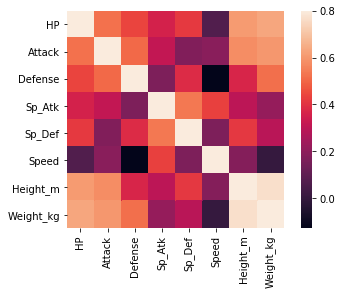

In [9]:
df3 = df2.drop(['isLegendary', 'Pr_Male', 'hasGender', 'Generation', 'Number', 'Total', 'hasMegaEvolution', 'Catchrate2', 'Catch_Rate', 'MegaEvolution'], axis= 1)
corrmat = df3.corr()
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Linear Regression

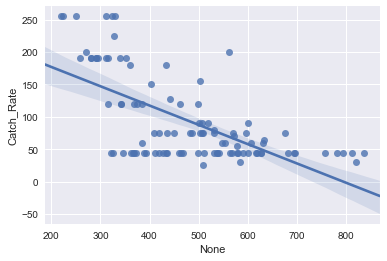

In [56]:
sns.regplot(x= df2['HP'] + df2['Attack'] + df2['Defense'] + df2['Sp_Atk'] + df2['Sp_Def'] + df2['Speed'] + df2['Height_m'] + df2['Weight_kg'], y=df2['Catch_Rate'])

In [11]:
regr = linear_model.LinearRegression()
Y = df2['Catch_Rate']
X = df2[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Height_m', 'Weight_kg']]
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [-0.19094606 -0.60623326 -0.94503195 -0.82944293  0.02134523 -0.54973142
 -9.71966771  0.1704577 ]

Intercept: 
 316.6279757895403

R-squared:
0.5693297923783909


## Random Forest

In [13]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

In [14]:
rfc = ensemble.RandomForestClassifier()
X = df2['Type_1'] + df2['Type_2'] + df2['Color'] + df2['Egg_Group_1'] + df2['Egg_Group_2']
#X = df4.drop(['Catch_Rate', 'Number', 'MegaEvolution', 'Catchrate2', 'Name', 'Body_Style', 'Pr_Male', 'isLegendary', 'Generation', 'hasGender', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'hasMegaEvolution'], 1)
Y = df2['Catch_Rate']
X = pd.get_dummies(X)
X = X.dropna(axis=1)
X = np.array(X.dropna(axis=1))
Y = pd.get_dummies(Y)

cross_val_score(rfc, X, Y, cv=10)

array([0.54545455, 0.63636364, 0.3       , 0.5       , 0.2       ,
       0.4       , 0.5       , 0.2       , 0.3       , 0.2       ])

In [15]:
rfc.fit(X, Y)
rfc.score(X, Y)

0.5980392156862745

In [16]:
di = rfc.feature_importances_
print(di)

[0.01429904 0.02980037 0.0305806  0.02131217 0.01717664 0.02727302
 0.02994151 0.00044211 0.00166476 0.00342669 0.03232912 0.03299559
 0.02974956 0.0155827  0.00097132 0.0021511  0.00080523 0.03037741
 0.01219127 0.0164677  0.02989613 0.02097918 0.00071081 0.02010033
 0.01181573 0.03200696 0.00011907 0.0320384  0.03098113 0.00298109
 0.02689687 0.01246115 0.03428655 0.00052598 0.01494806 0.02094115
 0.01933388 0.00104452 0.03198547 0.00766955 0.00065885 0.01106611
 0.00162895 0.02744695 0.00683326 0.00071299 0.00268114 0.00172287
 0.00326983 0.00274791 0.00078989 0.02188821 0.00063265 0.02506826
 0.02590714 0.00070932 0.0080939  0.001129   0.01235182 0.00724941
 0.02574917 0.01755803 0.0017869  0.01476673 0.0349372  0.00373835
 0.01565954 0.02131507 0.00064062]


In [17]:
#rfc2 = pd.read_csv('C:\\Users\\cocob\\Documents\\poke_dummies_rfc.csv')

In [18]:
#rfc2.head()

In [19]:
df4.columns.values

array(['Number', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk',
       'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'hasGender',
       'Pr_Male', 'hasMegaEvolution', 'Height_m', 'Weight_kg',
       'Catch_Rate', 'Body_Style', 'MegaEvolution', 'Catchrate2',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon', 'Type_1_Electric',
       'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire', 'Type_1_Ghost',
       'Type_1_Grass', 'Type_1_Ground', 'Type_1_Ice', 'Type_1_Normal',
       'Type_1_Poison', 'Type_1_Psychic', 'Type_1_Rock', 'Type_1_Steel',
       'Type_1_Water', 'Type_2_Bug', 'Type_2_Dark', 'Type_2_Dragon',
       'Type_2_Electric', 'Type_2_Fairy', 'Type_2_Fighting',
       'Type_2_Flying', 'Type_2_Ghost', 'Type_2_Grass', 'Type_2_Ground',
       'Type_2_Ice', 'Type_2_Normal', 'Type_2_Poison', 'Type_2_Psychic',
       'Type_2_Rock', 'Type_2_Steel', 'Type_2_Water', 'Color_Black',
       'Color_Blue', 'Color_Brown', 'Color_Green', 'Color_Grey',
       'Color_Pink', 'Color_Purpl

In [20]:
#df8 = df4.drop(['Name', 'isLegendary', 'Pr_Male', 'hasGender', 'Generation', 'Number', 'Total', 'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'MegaEvolution', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed'], axis= 1)

In [21]:
df.corr()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Number,1.000,0.160,0.108,0.138,0.121,0.120,0.112,0.028,0.983,0.135,-0.100,-0.013,-0.118,-0.010,0.087,-0.075
Total,0.160,1.000,0.643,0.704,0.606,0.724,0.707,0.549,0.093,0.482,-0.386,0.114,0.229,0.527,0.536,-0.738
HP,0.108,0.643,1.000,0.432,0.229,0.369,0.376,0.170,0.072,0.259,-0.155,-0.067,0.094,0.443,0.431,-0.479
Attack,0.138,0.704,0.432,1.000,0.433,0.335,0.207,0.335,0.094,0.303,-0.197,0.214,0.204,0.409,0.469,-0.525
Defense,0.121,0.606,0.229,0.433,1.000,0.203,0.484,-0.009,0.068,0.274,-0.269,0.064,0.123,0.354,0.477,-0.437
Sp_Atk,0.120,0.724,0.369,0.335,0.203,1.000,0.493,0.443,0.070,0.410,-0.337,0.106,0.176,0.331,0.285,-0.539
Sp_Def,0.112,0.707,0.376,0.207,0.484,0.493,1.000,0.233,0.055,0.360,-0.337,0.018,0.150,0.313,0.329,-0.513
Speed,0.028,0.549,0.170,0.335,-0.009,0.443,0.233,1.000,0.004,0.286,-0.217,0.070,0.148,0.225,0.109,-0.411
Generation,0.983,0.093,0.072,0.094,0.068,0.070,0.055,0.004,1.000,0.072,-0.030,0.011,-0.125,-0.051,0.034,-0.025
isLegendary,0.135,0.482,0.259,0.303,0.274,0.410,0.360,0.286,0.072,1.000,-0.645,0.095,0.048,0.326,0.425,-0.319


In [22]:
#features_names = df.columns
#plt.xticks(range(di.shape[1]), feature_names)

In [23]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [24]:
indices = np.argsort(di)[::-1]

In [25]:
print(indices)

[64 32 11 10 27 25 38 28  2 17  6 20  1 12 43  5 30 54 60 53 51 67  3 21
 35 23 36 61  4 19 66 13 34 63  0 31 58 18 24 41 56 39 59 44 65  9 48 29
 49 46 15 62 47  8 42 57 37 14 16 50 45 22 55 40 68 52 33  7 26]


In [26]:
#di_names = feature_names[di > np.mean(di)]
#print(di_names)

In [27]:
#import pandas as pd 
#feature_importances = pd.DataFrame(rfc.feature_importances_, index = df7.columns, columns=['importance']).sort_values('importance', ascending=False)

In [28]:
df7 = df2.drop(['Name'], 1)

In [29]:
df7.head()

,Number,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,MegaEvolution,Catchrate2
0,1,Grass,Poison,318,45,49,49,65,65,45,...,0.875,Monster,Grass,False,0.710,6.900,45,quadruped,0,0
1,2,Grass,Poison,405,60,62,63,80,80,60,...,0.875,Monster,Grass,False,0.990,13.000,45,quadruped,0,0
2,3,Grass,Poison,525,80,82,83,100,100,80,...,0.875,Monster,Grass,True,2.010,100.000,45,quadruped,1,0
5,6,Fire,Flying,534,78,84,78,109,85,100,...,0.875,Monster,Dragon,True,1.700,90.500,45,bipedal_tailed,1,0
33,34,Poison,Ground,505,81,102,77,85,75,85,...,1.000,Monster,Field,False,1.400,62.000,45,bipedal_tailed,0,0


## Graphs

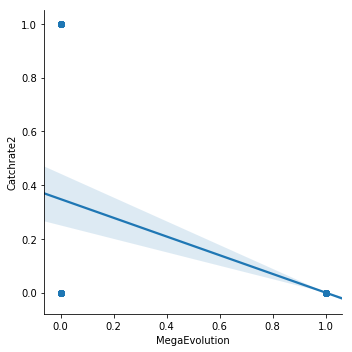

In [30]:
sns.lmplot(y='Catchrate2', x='MegaEvolution', data=df2, fit_reg=True)
plt.show()

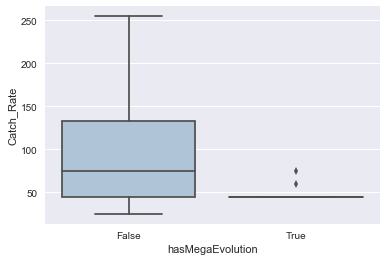

In [31]:
sns.set(style='darkgrid')
df6= sns.boxplot(x='hasMegaEvolution', y='Catch_Rate', data=df2, palette='BuPu') 
#plt.title('')
plt.show()

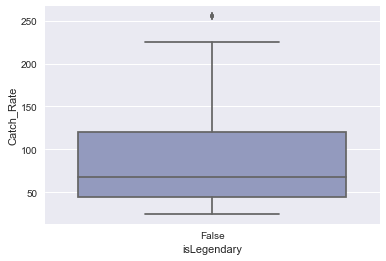

In [32]:
sns.set(style='darkgrid')
df6= sns.boxplot(x='isLegendary', y='Catch_Rate', data=df2, palette='BuPu') 
#plt.title('')
plt.show()

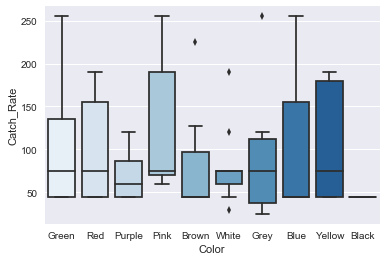

In [53]:
sns.set(style='darkgrid')
df6= sns.boxplot(x='Color', y='Catch_Rate', data=df2, palette='Blues') 
#plt.title('')
plt.show()

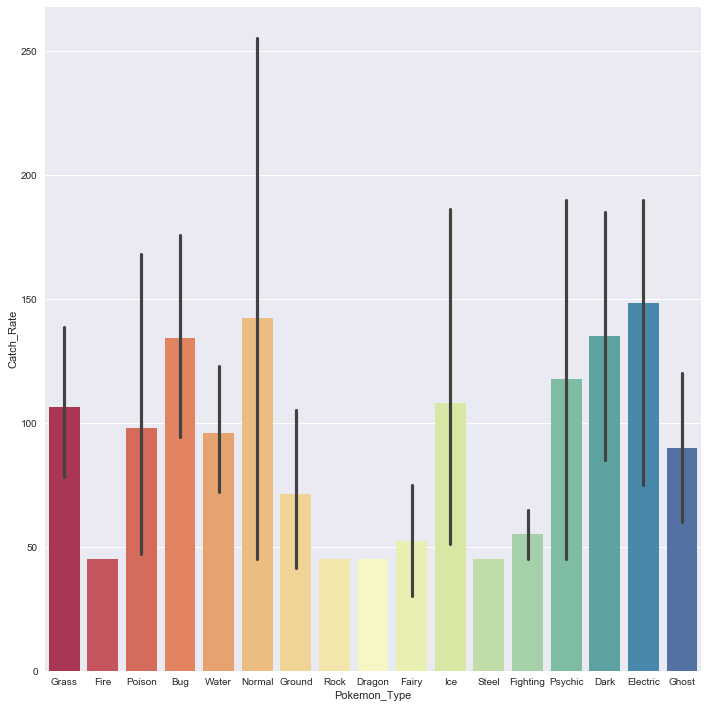

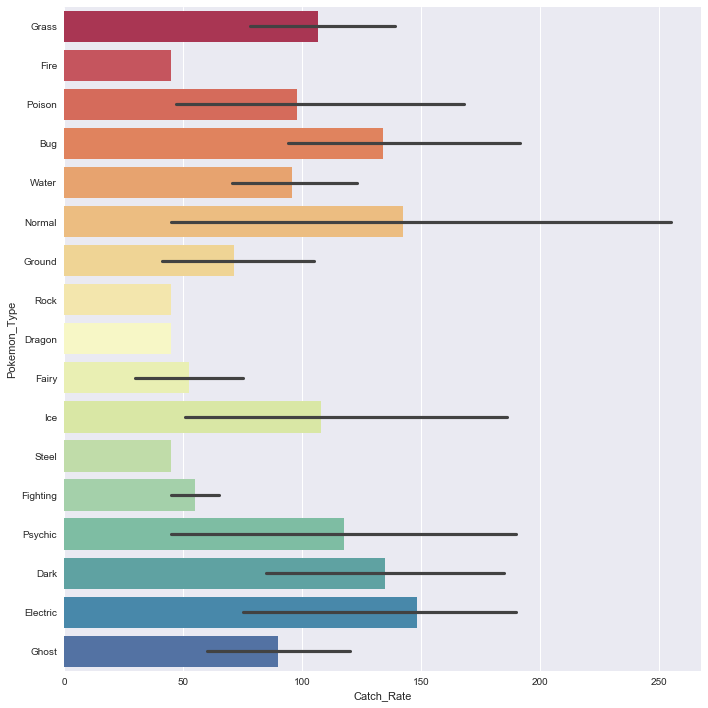

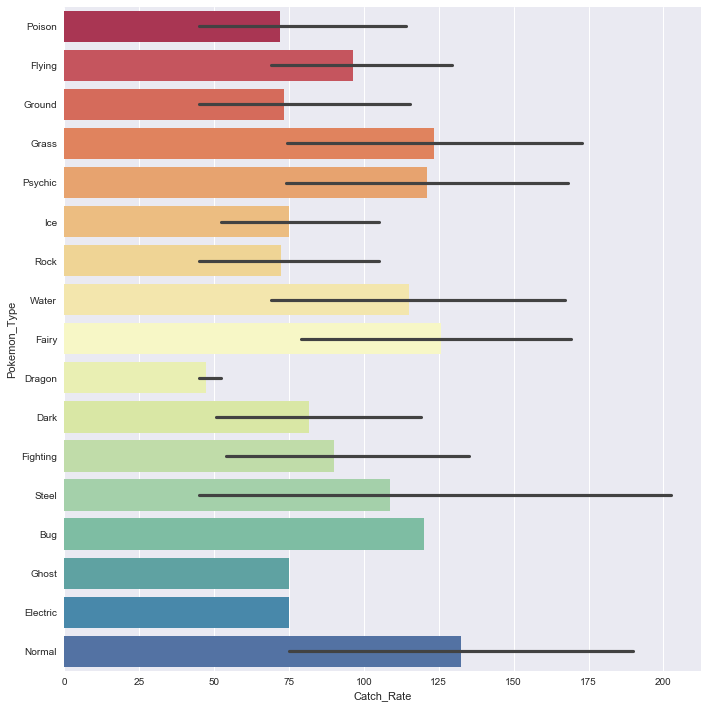

In [37]:
sns.set(style='darkgrid')
df4 = sns.factorplot(y='Catch_Rate', x='Type_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_xlabels('Pokemon_Type')
df4.set_ylabels('Catch_Rate')
#plt.title('Catch Rate Based on Pokemon Type')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Type_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Pokemon_Type')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Pokemon Type')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Type_2', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Pokemon_Type')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Pokemon Type')
plt.show()

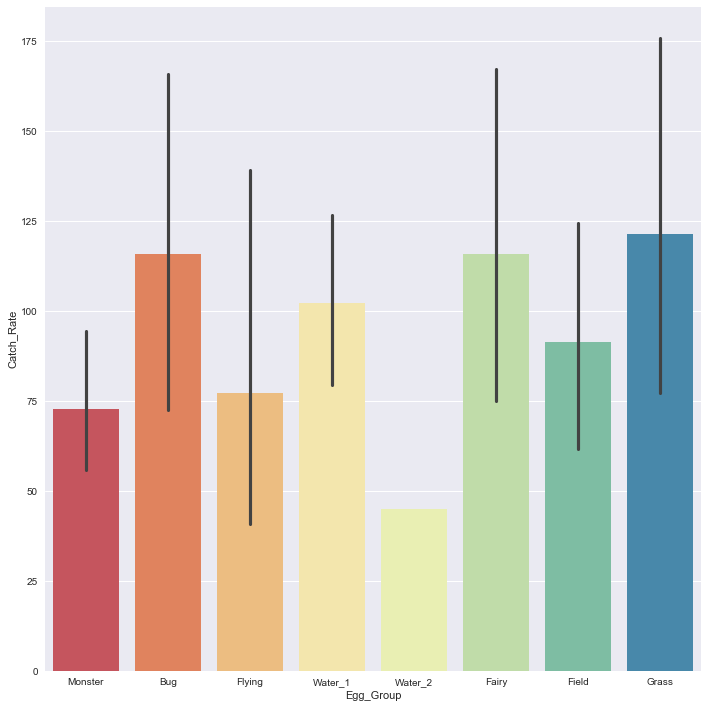

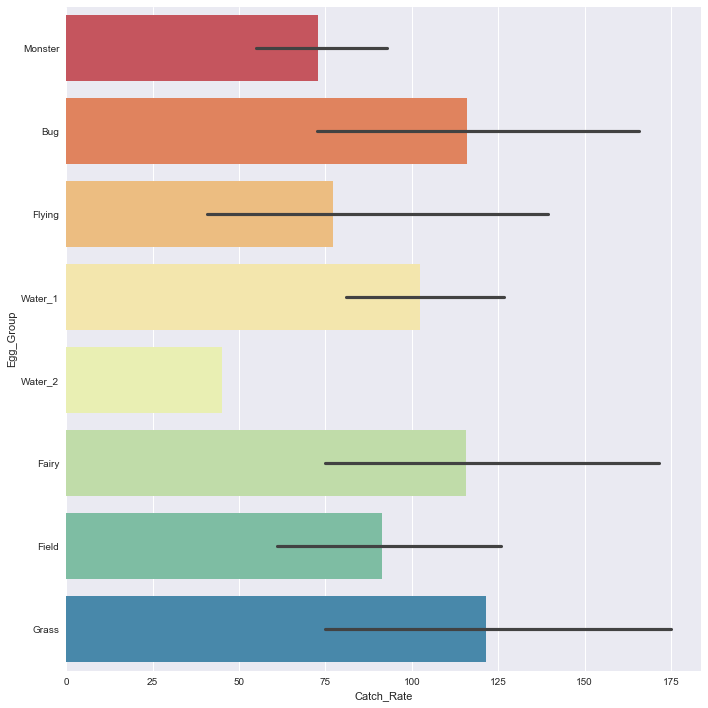

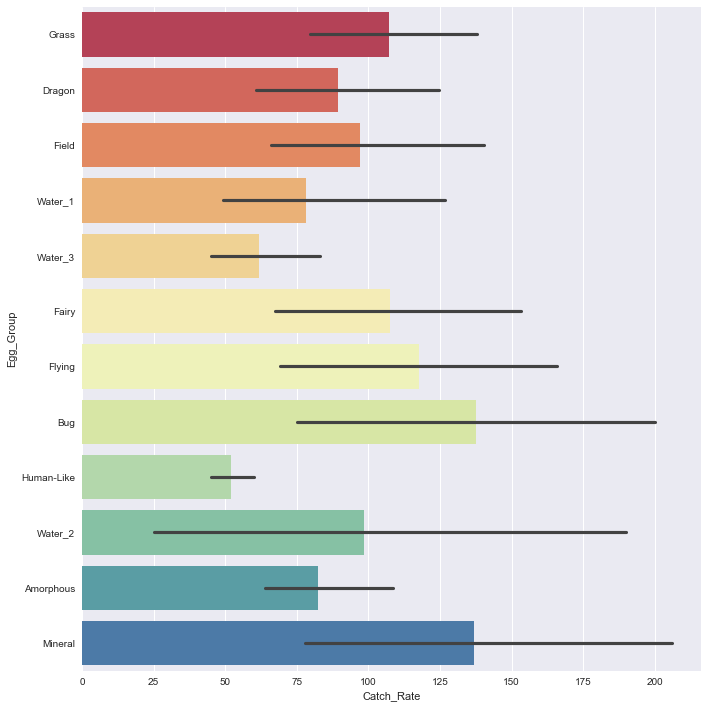

In [36]:
sns.set(style='darkgrid')
df4 = sns.factorplot(y='Catch_Rate', x='Egg_Group_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_xlabels('Egg_Group')
df4.set_ylabels('Catch_Rate')
#plt.title('Catch Rate Based on Egg Group')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Egg_Group_1', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Egg_Group')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Egg Group')
plt.show()

sns.set(style='darkgrid')
df4 = sns.factorplot(x='Catch_Rate', y='Egg_Group_2', data=df2, size=10, kind='bar', palette='Spectral')
df4.despine(left=True)
df4.set_ylabels('Egg_Group')
df4.set_xlabels('Catch_Rate')
#plt.title('Catch Rate Based on Egg Group')
plt.show()

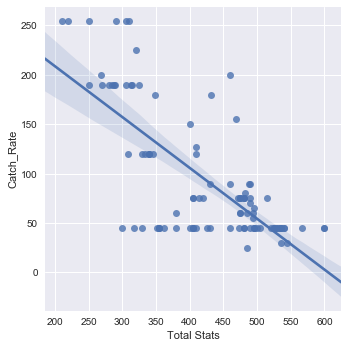

In [38]:
df5 = sns.lmplot(y='Catch_Rate', x='Total', data=df2, fit_reg=True)
df5.set_ylabels('Catch_Rate')
df5.set_xlabels('Total Stats')
#plt.title('Catch Rate based on Total Stats')
plt.show()

## Catch Rate Count

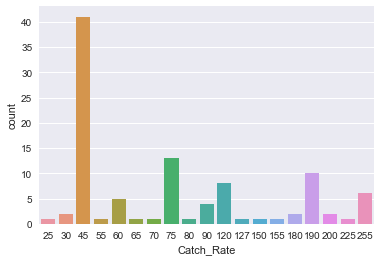

In [39]:
sns.countplot(x='Catch_Rate', data=df2)

## T-test

In [40]:
stats.ttest_ind(df2['Catch_Rate'], df2['Total'])

Ttest_indResult(statistic=-28.9782688370252, pvalue=6.9472948827642514e-74)

In [41]:
stats.ttest_ind(df2['Catch_Rate'], df2['HP'])

Ttest_indResult(statistic=3.5680646906594466, pvalue=0.00044918146223215337)

In [42]:
stats.ttest_ind(df2['Catch_Rate'], df2['Attack'])

Ttest_indResult(statistic=2.548385168082947, pvalue=0.011565452093331985)

In [43]:
stats.ttest_ind(df2['Catch_Rate'], df2['Defense'])

Ttest_indResult(statistic=2.7379890360199592, pvalue=0.0067336197984985535)

In [44]:
stats.ttest_ind(df2['Catch_Rate'], df2['Sp_Atk'])

Ttest_indResult(statistic=3.6247702097347037, pvalue=0.000366043374590726)

In [45]:
stats.ttest_ind(df2['Catch_Rate'], df2['Sp_Def'])

Ttest_indResult(statistic=3.5227364790782802, pvalue=0.0005280849773564675)

In [46]:
stats.ttest_ind(df2['Catch_Rate'], df2['Speed'])

Ttest_indResult(statistic=4.868106443533865, pvalue=2.268096492132681e-06)

In [47]:
stats.ttest_ind(df2['Catch_Rate'], df2['Height_m'])

Ttest_indResult(statistic=14.281587750746244, pvalue=1.9027686428111475e-32)

In [48]:
stats.ttest_ind(df2['Catch_Rate'], df2['Weight_kg'])

Ttest_indResult(statistic=4.41901869915034, pvalue=1.616571871598089e-05)

In [49]:
stats.ttest_ind(df2['Catchrate2'], df2['MegaEvolution'])

Ttest_indResult(statistic=3.9331438129268244, pvalue=0.00011522589389600649)